In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6,6)
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams["image.origin"] = 'lower'

In [2]:
classes = { "WWewk": 0, "top":1 }
signal_name = "WWewk"
sample_names = ["WWewk", "top"]

In [3]:
samples = {}

In [4]:
base_dir="/eos/home-b/bpinolin/ML_output/"
plot_config="VBSOS"
cut= "sr"
version = "v0"

In [5]:
samples_dir = os.path.join(base_dir, plot_config, cut, "samples/" + version)

In [6]:
for file in os.listdir(samples_dir):
    if os.path.isdir(os.path.join(samples_dir, file)): continue
    sname = file.split("_part")[0]
    print(sname)
    s = pickle.load(open(os.path.join(samples_dir, file), "rb"))
    s.rename(columns=lambda c: c.split(cut+"_")[1] if cut in c else c, inplace=True)
    s["sample_name"]= sname
    s["class"] = classes[sname]
    if sname == signal_name:
        s["signal"] = 1
    else: 
        s["signal"] = 0
    if sname in samples:
        samples[sname] = pd.concat([samples[sname], s], ignore_index=True)
    else:
        samples[sname] = s

WWewk
top
top


In [7]:
for s, df in samples.items():
    print(f"Sample name {s:10}, nsamples: {len(df):10},   XS total: {(df.weight_).sum()*41.5 :15}")

Sample name WWewk     , nsamples:       2141,   XS total: 45.52107548527645
Sample name top       , nsamples:      48365,   XS total: 11927.043236644598


In [8]:
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight
from sklearn.preprocessing import LabelEncoder 

In [9]:
# _ = plt.hist(samples["WWewk"]["weight_"], bins=100, range=(0,0.001))

# Balancing

In [10]:
bkg_list = []
bkg_names = [ name for name in sample_names if name != signal_name ]
for bkg_name in bkg_names:
    bkg_list.append(samples[bkg_name])

In [11]:
background = pd.concat(bkg_list, ignore_index=True)

In [12]:
signal = samples["WWewk"]

In [13]:
signal

,detajj,ptll,eta1,eta2,detall,jetpt1,jetpt2,met,dphill,dphijj,...,Jet_nConst_central,Jet_nConst_forward,qgl_forward,qgl_central,area_forward,area_central,weight_,sample_name,class,signal
0,4.994629,103.275993,-0.753296,-1.987305,1.234009,96.18750,56.250000,60.936337,1.591064,1.294098,...,17.0,8.0,-1.000000,0.838867,0.508789,0.528809,0.000423,WWewk,0,1
1,3.246765,99.100037,-1.148926,-0.940796,0.208130,135.37500,103.375000,26.428537,1.406494,2.529663,...,24.0,20.0,0.412842,0.715332,0.518555,0.518555,0.000385,WWewk,0,1
2,3.580200,82.617783,2.318359,0.936279,1.382080,77.75000,62.312500,179.426773,1.144513,1.562012,...,9.0,16.0,0.798340,-1.000000,0.488770,0.518555,0.000366,WWewk,0,1
3,3.493408,107.095276,0.780762,2.380859,1.600098,164.50000,46.093750,91.594185,1.675812,4.351074,...,4.0,8.0,0.836914,-1.000000,0.498779,0.538574,0.000364,WWewk,0,1
4,6.832520,34.643391,1.887451,-1.311768,3.199219,105.50000,85.562500,80.067757,2.945783,2.680664,...,7.0,15.0,0.086670,0.999023,0.518555,0.468750,0.000376,WWewk,0,1
5,4.256836,101.874550,0.613159,0.885864,0.272705,173.37500,157.000000,141.790970,1.335266,4.104004,...,38.0,16.0,0.949219,0.743164,0.528809,0.488770,0.000063,WWewk,0,1
6,5.369629,81.860649,1.656494,-0.567627,2.224121,190.37500,109.687500,25.381924,2.234601,2.794189,...,8.0,13.0,0.116455,0.999512,0.498779,0.478760,0.000634,WWewk,0,1
7,4.021606,56.802826,2.258301,-0.766479,3.024780,174.62500,151.250000,142.674622,2.487409,2.587646,...,19.0,15.0,0.123352,0.998047,0.498779,0.478760,0.000345,WWewk,0,1
8,5.971680,125.391029,-1.358643,1.042480,2.401123,111.93750,30.156250,48.050930,0.751709,0.490112,...,16.0,16.0,0.120178,-1.000000,0.508789,0.498779,0.000166,WWewk,0,1
9,4.618896,62.786617,-1.524170,-0.642700,0.881470,177.50000,53.812500,128.533768,2.022339,3.216797,...,44.0,14.0,-1.000000,0.050873,0.538574,0.757812,0.000035,WWewk,0,1


ratio_neve_bkgsignal= len(background) / len(signal)
print(ratio_neve_bkgsignal)

tot_ev_weighted_sig = (signal.weight_ / signal.weight_.mean()).sum()
print("TOT signal weighted events", tot_ev_weighted_sig)

rescale_factor_bkg = (tot_ev_weighted_sig *ratio_neve_bkgsignal )/ background.weight_.sum()
print(rescale_factor_bkg)

signal["weight_norm"] = signal.weight_ / signal.weight_.mean()
background["weight_norm"] = background.weight_ * rescale_factor_bkg

print("Effective sig events: ", signal.weight_norm.sum())
print("Effective bkg events: ", background.weight_norm.sum())

In [14]:
## normalization by bkg events

ratio_neve_bkgsignal= len(background) / len(signal)
print(ratio_neve_bkgsignal)

tot_ev_weighted_bkg = (background.weight_ / background.weight_.mean()).sum()
print("TOT bkg weighted events", tot_ev_weighted_bkg)

rescale_factor_sig  = (tot_ev_weighted_bkg )/ signal.weight_.sum()
print("Rescale facor for signal", rescale_factor_sig)

signal["weight_norm"] = signal.weight_ * rescale_factor_sig
background["weight_norm"] = background.weight_ / background.weight_.mean()

print("Effective sig events: ", signal.weight_norm.sum())
print("Effective bkg events: ", background.weight_norm.sum())

22.589911256422234
TOT bkg weighted events 48365.00000000001
Rescale facor for signal 44092.70823685177
Effective sig events:  48365.000000000015
Effective bkg events:  48365.00000000001


In [15]:
## normalization by signal events

tot_ev_weighted_sig = (signal.weight_ / signal.weight_.mean()).sum()
print("TOT signal weighted events", tot_ev_weighted_sig)

rescale_factor_bkg = (tot_ev_weighted_sig )/ background.weight_.sum()
print(rescale_factor_bkg)

signal["weight_norm"] = signal.weight_ / signal.weight_.mean()
background["weight_norm"] = background.weight_ * rescale_factor_bkg

print("Effective sig events: ", signal.weight_norm.sum())
print("Effective bkg events: ", background.weight_norm.sum())

TOT signal weighted events 2141.0
7.449583122748563
Effective sig events:  2141.0
Effective bkg events:  2141.0


# Save signal and bkg samples

In [16]:
import os

os.makedirs(os.path.join(samples_dir, "for_training"), exist_ok=True)
pickle.dump(background, open(os.path.join(samples_dir, "for_training/background_balanced.pkl"), "wb"))
pickle.dump(signal, open(os.path.join(samples_dir, "for_training/signal_balanced.pkl"), "wb"))

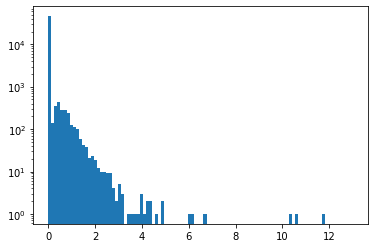

In [17]:
plt.hist(background["weight_norm"], bins=100, range=(0, 13))
plt.yscale("log")

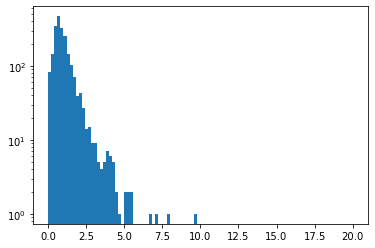

In [18]:
plt.hist(signal["weight_norm"], bins=100, range=(0, 20))
plt.yscale("log")

In [19]:
lumi = 59.74
print("Ns = ", round((signal.weight_).sum()*lumi,1))
print("Nb = ", round((background.weight_).sum()*lumi,1))

Ns =  65.5
Nb =  17169.2


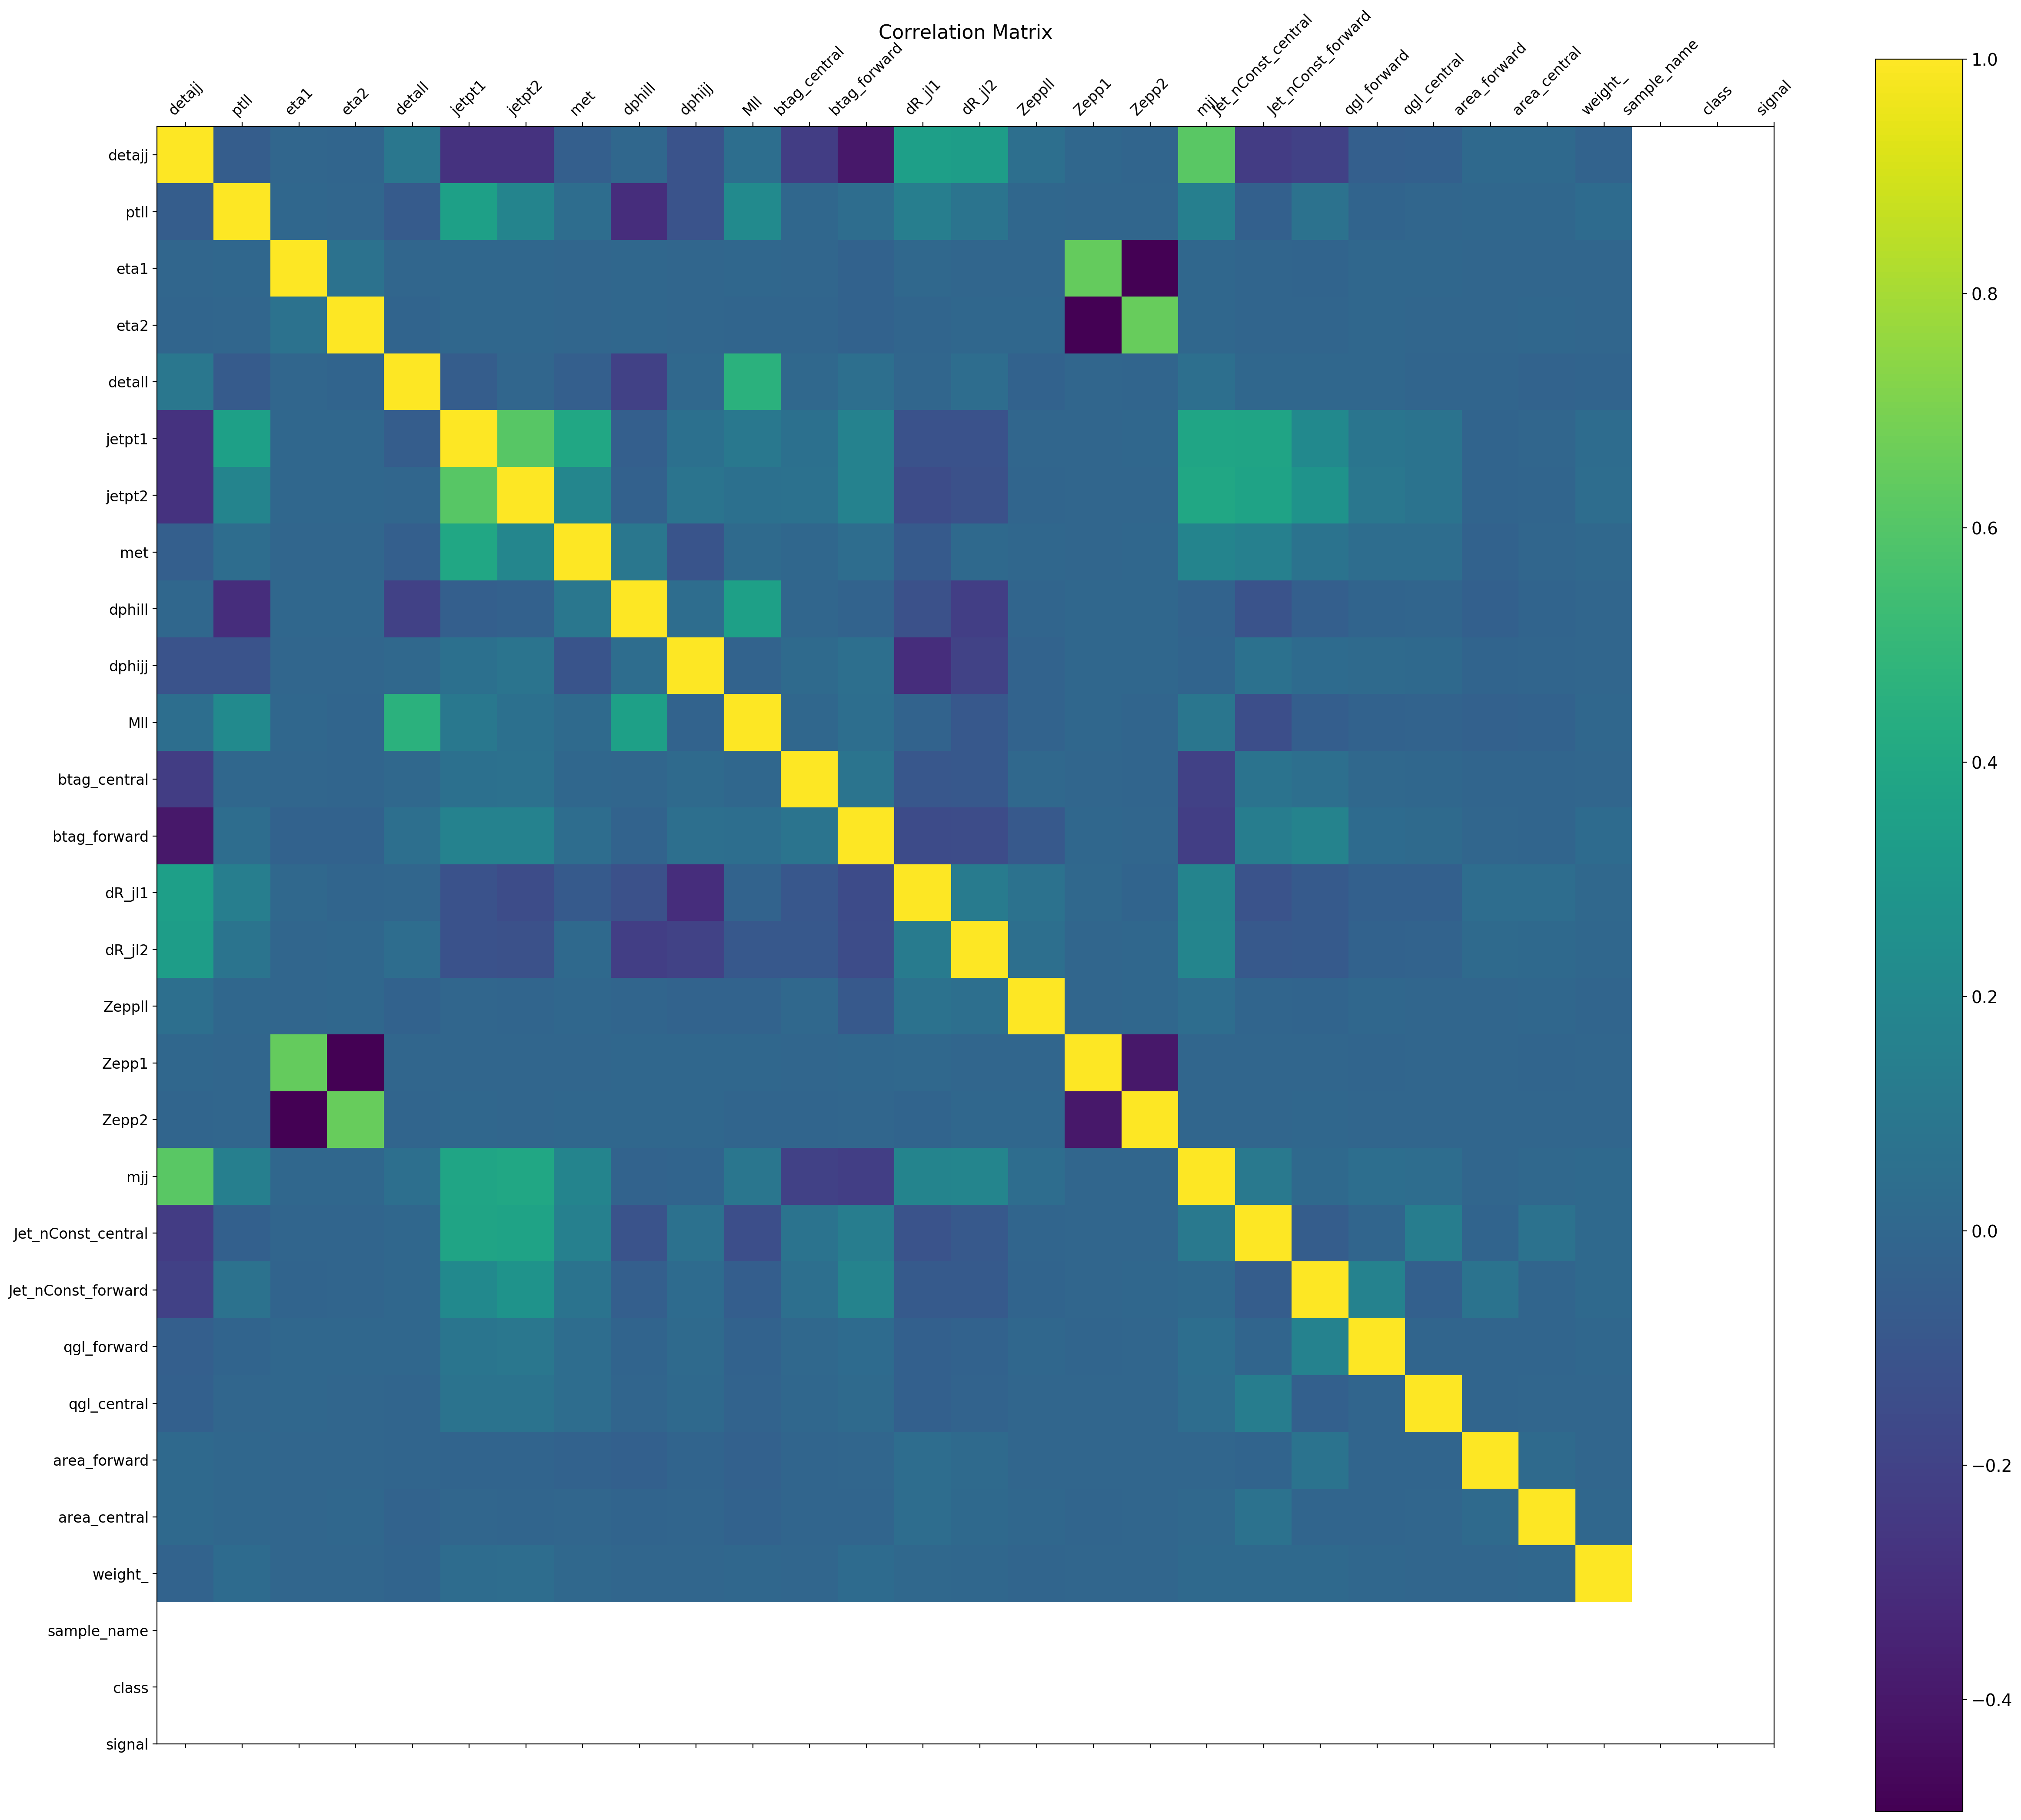

In [20]:
f = plt.figure(figsize=(30, 26), dpi=200)
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [21]:
df.columns

Index(['detajj', 'ptll', 'eta1', 'eta2', 'detall', 'jetpt1', 'jetpt2', 'met',
       'dphill', 'dphijj', 'Mll', 'btag_central', 'btag_forward', 'dR_jl1',
       'dR_jl2', 'Zeppll', 'Zepp1', 'Zepp2', 'mjj', 'Jet_nConst_central',
       'Jet_nConst_forward', 'qgl_forward', 'qgl_central', 'area_forward',
       'area_central', 'weight_', 'sample_name', 'class', 'signal'],
      dtype='object')